# Task 1: Introduction

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [ ]:
def generate_examples(num=1000):
    W =[1.0, -3.0]
    b = 1.0

    W = np.reshape(W,(2,1))
    x = np.random.randn(num, 2)
    y = b + np.dot(x, W) + np.random.randn(num, 1)
    y = np.reshape(y, (num,1))
    return x, y

In [ ]:
x, y = generate_examples()

In [ ]:
print(x.shape, y.shape)

(1000, 2) (1000, 1)


In [ ]:
print(x[0], y[0])

[ 0.91457003 -0.05539988] [1.87112861]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to
$
\begin{equation}
min(J)
\end{equation}
$

In [ ]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features,1)
        self.b = np.random.randn()

In [ ]:
model = Model(2)
print(model.W)
print(model.b)

[[-1.20616533]
 [-0.01641329]]
-1.4360698794873306


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [ ]:
class Model(Model):
    def forward_pass(self, x):
        y_hat = self.b + np.dot(x, self.W)
        return y_hat

    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        return np.sum((y_hat - y_true)**2) / (2*m)

In [ ]:
y_hat = Model(2).forward_pass(x)
print(y_hat.shape, y_hat[0])

(1000, 1) [0.20774496]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [ ]:
def compute_loss(self, y_hat, y_true):
    m = y_hat.shape[0]
    return np.sum((y_hat - y_true)**2) / (2*m)


In [ ]:
model = Model(2)
y_hat= model.forward_pass(x)
loss = model.compute_loss(y_hat, y)

In [ ]:
loss

0.43898114178166064

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [ ]:
class Model(Model):
    def backward_pass(self, x, y_true, y_hat):
        m = y_true.shape[0]
        db = 1/m*np.sum(y_hat-y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat-y_true), x), axis=0)
        return dW, db

In [ ]:
model = Model(2)
x, y = generate_examples()
y_hat = model.forward_pass(x)
dW, db = model.backward_pass(x, y, y_hat)

In [ ]:
print(dW, db)

[-1.59121256  1.50820463] -3.8051705637168594


# Task 7: Update Parameters

In [ ]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W= self.W-lr*np.reshape(dW, (self.num_features,1))
        self.b = self.b-db

# Task 8: Training Loop

In [ ]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10) == 0:
                print('Iter: {}, Loss: {:.4f}'.format(i, loss))
        return losses


In [ ]:
import numpy as np

class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

    def forward_pass(self, X):
        y = self.b + np.dot(X, self.W)
        return y

    def compute_loss(self, y, y_true):
        loss = np.sum(np.square(y - y_true))
        return loss/(2*y.shape[0])

    def backward_pass(self, X, y_true, y_hat):
        m = y_hat.shape[0]
        db = np.sum(y_hat - y_true)/m
        dW = np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)/m
        return dW, db

    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr * db

    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            loss = self.compute_loss(y_hat, y_train)
            losses.append(loss)
            if i % int(iterations/10) == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
        return losses

In [ ]:
model = Model(2)

In [ ]:
x_train, y_train = generate_examples()

In [ ]:
losses = model.train(x_train, y_train, 1000, 3e-2)

Iter: 0, Loss: 4.5705
Iter: 100, Loss: 0.5064
Iter: 200, Loss: 0.4904
Iter: 300, Loss: 0.4903
Iter: 400, Loss: 0.4903
Iter: 500, Loss: 0.4903
Iter: 600, Loss: 0.4903
Iter: 700, Loss: 0.4903
Iter: 800, Loss: 0.4903
Iter: 900, Loss: 0.4903


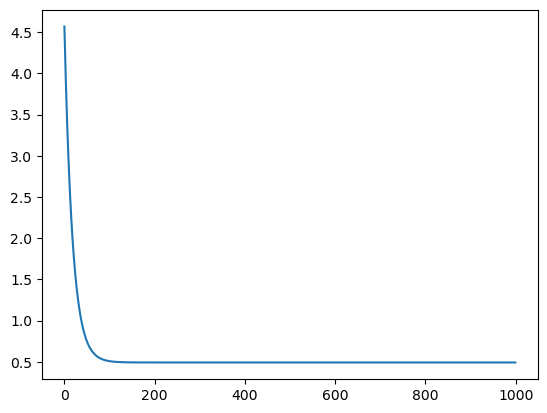

In [ ]:
plt.plot(losses)

# Task 9: Predictions

In [ ]:
import numpy as np

# ---------------------------
# Data Generator
# ---------------------------
def generate_examples(num=1000):
    W = np.array([[1.0], [-3.0]])   # true weights
    b = 1.0                         # true bias
    x = np.random.randn(num, 2)     # (num,2) features
    noise = np.random.randn(num, 1) # per-sample noise
    y = b + x @ W + noise           # linear relation + noise
    return x, y


# ---------------------------
# Linear Regression Model
# ---------------------------
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

    def forward_pass(self, x):
        return self.b + x @ self.W

    def compute_loss(self, y_hat, y_true):
        m = y_hat.shape[0]
        return np.sum((y_hat - y_true) ** 2) / (2 * m)

    def backward_pass(self, x, y_true, y_hat):
        m   = y_true.shape[0]
        err = y_hat - y_true          # (m,1)
        dW  = (x.T @ err) / m         # (n,1)
        db  = np.sum(err) / m         # scalar
        return dW, db

    def update_params(self, dW, db, lr):
        self.W -= lr * dW
        self.b -= lr * db

    def train(self, x_train, y_train, iterations=1000, lr=1e-3, log=True):
        losses = []
        log_every = max(iterations // 10, 1)

        for i in range(1, iterations + 1):   # start from 1
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)

            losses.append(loss)

            if log and (i % log_every == 0 or i == 1):
                print(f"Iter: {i}, Loss: {float(loss):.6f}")

        return losses


# ---------------------------
# Training Example
# ---------------------------
x_train, y_train = generate_examples(1000)
model = Model(num_features=2)

losses = model.train(x_train, y_train, iterations=500, lr=3e-3)

print("\nFinal Weights:\n", model.W)
print("Final Bias:\n", model.b)


Iter: 1, Loss: 5.853940
Iter: 50, Loss: 4.537987
Iter: 100, Loss: 3.526702
Iter: 150, Loss: 2.767158
Iter: 200, Loss: 2.196527
Iter: 250, Loss: 1.767702
Iter: 300, Loss: 1.445351
Iter: 350, Loss: 1.202970
Iter: 400, Loss: 1.020668
Iter: 450, Loss: 0.883516
Iter: 500, Loss: 0.780302

Final Weights:
 [[ 0.86368048]
 [-2.2015476 ]]
Final Bias:
 0.9242622893331771



Linear Regression using 'mean_radius':
Mean Squared Error: 0.0292
R-squared: 0.8834
Coefficient for mean_radius: 0.0863
Intercept: -0.8437


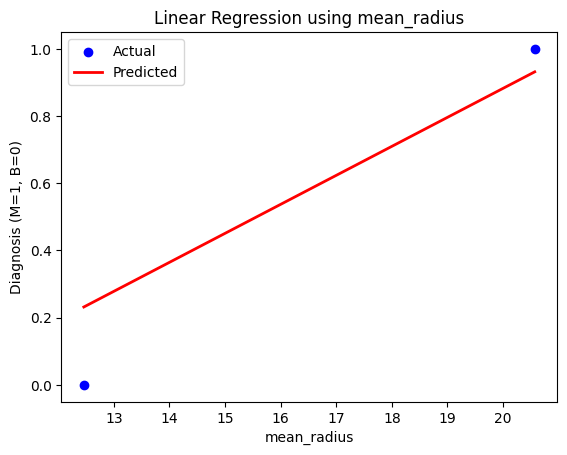

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
file_path = 'breast_cancer_prediction_AP23110010027.csv'
try:
    df = pd.read_csv(file_path, low_memory=False)
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Please check the path.")
    df = None

if df is not None:
    if 'diagnosis' in df.columns:
        # Convert diagnosis to numeric (M=1, B=0)
        df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

        # Choose one feature (example: 'mean_radius')
        feature = 'mean_radius'
        if feature not in df.columns:
            raise ValueError(f"Error: Feature '{feature}' not found in dataset.")

        X = df[[feature]]   # Independent variable (2D dataframe)
        y = df['diagnosis'] # Target variable

        # Drop missing values (both X and y together)
        df_clean = pd.concat([X, y], axis=1).dropna()
        X = df_clean[[feature]]
        y = df_clean['diagnosis']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Evaluation
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\nLinear Regression using '{feature}':")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R-squared: {r2:.4f}")
        print(f"Coefficient for {feature}: {model.coef_[0]:.4f}")
        print(f"Intercept: {model.intercept_:.4f}")

        # Visualization
        plt.scatter(X_test, y_test, color="blue", label="Actual")
        plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
        plt.xlabel(feature)
        plt.ylabel("Diagnosis (M=1, B=0)")
        plt.title(f"Linear Regression using {feature}")
        plt.legend()
        plt.show()

    else:
        print("Error: 'diagnosis' column not found in the dataset.")